# Visualizing FordGoBike Data
## (2017)

## Table of Contents

    Preliminary Wrangling

    Univariate Exploration

    Bivariate Explorationn

    Multivariate Exploration

    Summary

    Sources

# Preliminary Wrangling

In [2]:
#all package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import calendar
import datetime

**Loading in the dataset**

In [3]:
#load data
df=pd.read_csv('2017-fordgobike-tripdata.csv')

In [4]:
# information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


# Cleaning
    we need to clean our data like:-
          .Starting and ending times to the timestamp format
          .Bike ID, start station ID, and end station ID to object format
          .User type to category format

In [7]:
# Changing the format to datetime
df_cleaned.start_time = pd.to_datetime(df_cleaned.start_time)
df_cleaned.end_time = pd.to_datetime(df_cleaned.end_time)


In [9]:
#Bike ID, start station ID, and end station ID to object format
df_cleaned['bike_id ']=df_cleaned.bike_id.astype(str)
df_cleaned['start_station_id  ']=df_cleaned.start_station_id .astype(str)
df_cleaned['end_station_id ']=df_cleaned.end_station_id.astype(str)

In [10]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 17 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
user_type                  519700 non-null category
bike_id                    519700 non-null object
start_station_id           519700 non-null object
end_station_id             519700 non-null object
dtypes: category(1), 

## Define
    
   **Add new coloumns like month weekday **


In [11]:
# Start time month (January - December) and (1-12)
# a. month of the year
df_cleaned['start_time'] = pd.to_datetime(df_cleaned['start_time'])
df_cleaned['start_month_num'] = df_cleaned['start_time'].apply(lambda time: time.month)
df_cleaned['start_month_char'] = df_cleaned['start_month_num'].apply(lambda x: calendar.month_abbr[x])

In [12]:
# Start time weekday
df_cleaned['start_time_weekday'] = df_cleaned['start_time'].dt.strftime('%a')

In [13]:
# Start and end time hour
df_cleaned['start_time_hour'] = df_cleaned['start_time'].dt.hour
df_cleaned['end_time_hour'] = df_cleaned['end_time'].dt.hour

In [14]:
#adding duration minute
df_cleaned['duration_min'] = df_cleaned['duration_sec']/60


## What is the structure of your dataset?

The column header descriptions are as follows:

      Trip Duration:-
            .Start Time and Date

            .End Time and Date

      Start Station ID:-
            .Start Station Name
           
           .Start Station Latitude

           .Start Station Longitude

      End Station ID:-

           .End Station Name

           .End Station Latitude

          .End Station Longitude

          .Bike ID
      
      .User Type 
what i added:

        .Start Time Month
        
        .Start Time Month Number

        .Start Time Day of the Week
        
        .Start Time Hour
        
        .duration minute


## Ford GoBike Usage by Month

October is the most popular month, with september as the second most popular, and November as the third most popular months to use the bike system.

surprisingly, the winter months are the most popular times to use the Ford Go Bike sharing system in 2017.


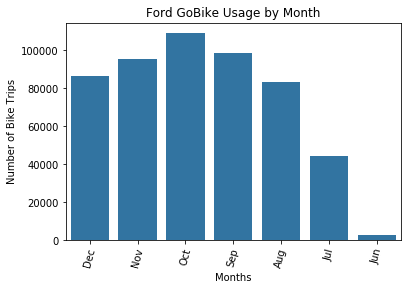

In [62]:
# Monthly usage of the Ford Go Bike system

base_color=sb.color_palette()[0]

sb.countplot(data=df_cleaned,x='start_month_char',color =base_color);
plt.xlabel("Months")
plt.ylabel("Number of Bike Trips")
plt.title('Ford GoBike Usage by Month')
plt.xticks(rotation=75);


## No. of bikes trips by each user type

'Customer' bikers bike longer than 'Subscriber' bikers.


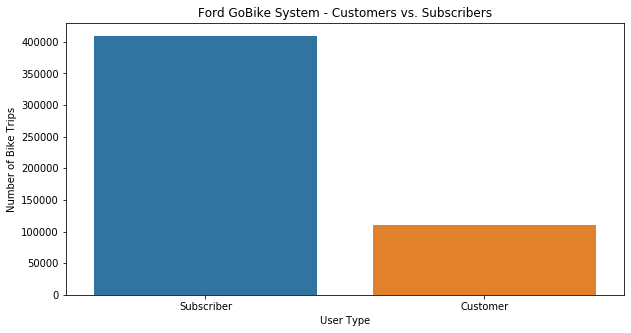

In [52]:
# Customers vs Subscribers Visuals
# bar chart
plt.figure(figsize = [10, 5])

sb.countplot(data = df_cleaned, x = "user_type",order=df_cleaned.user_type.value_counts().index);
plt.xlabel('User Type');
plt.ylabel('Number of Bike Trips');
plt.title('Ford GoBike System - Customers vs. Subscribers');

## Avg. Trip Duration in Minute in each weekday for usertype

It can be seen from the above plot that subscribers ride much shorter/quicker trips compared to customers on each day of the week. 

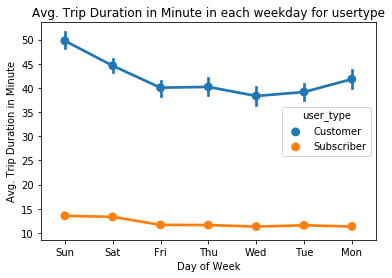

In [23]:
sb.pointplot(data=df_cleaned, x='start_time_weekday', y='duration_min', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');
plt.title("Avg. Trip Duration in Minute in each weekday for usertype");

## Sources

.[FordGoBike Data Set](https://s3.amazonaws.com/baywheels-data/index.html)dataset


.[Matplotlib](https://matplotlib.org/)